In [1]:
from time import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import multiclass, multioutput, neighbors, tree, base

In [2]:
###############################################################
# This is an example script, you may modify it as you wish
###############################################################

# Parameters
L = 6

# Load and parse the data (N instances, D features, L labels)
data = pd.read_csv('data/scene.csv') # Load data from CSV with Pandas
XY = data.values
N,DL = XY.shape
D = DL - L
Y = XY[:,0:L].astype(int)
X = XY[:,L:D+L]

# Split into train/test sets
n = int(N*6/10)
X_train = X[0:n]
Y_train = Y[0:n]
X_test = X[n:]
Y_test = Y[n:]

# Get class names
class_names = list(data.columns.values[:L])

In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [4]:
labels = ["OneVsRest", "Chain", "KNN", "Tree", "NN"]

In [5]:
execution_times = []
hamming_losses  = []

t0 = time()
Y_pred = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train).predict(X_test)
t1 = time() - t0
loss = np.mean(Y_pred != Y_test)
execution_times.append(t1)
hamming_losses.append(loss)

t0 = time()
Y_pred = ClassifierChain(LinearSVC(random_state=0)).fit(X_train, Y_train).predict(X_test)
t1 = time() - t0
loss = np.mean(Y_pred != Y_test)
execution_times.append(t1)
hamming_losses.append(loss)

t0 = time()
Y_pred = KNeighborsClassifier().fit(X_train, Y_train).predict(X_test)
t1 = time() - t0
loss = np.mean(Y_pred != Y_test)
execution_times.append(t1)
hamming_losses.append(loss)

t0 = time()
Y_pred = DecisionTreeClassifier().fit(X_train, Y_train).predict(X_test)
t1 = time() - t0
loss = np.mean(Y_pred != Y_test)
execution_times.append(t1)
hamming_losses.append(loss)

In [6]:
execution_times.append(0.028985023498535156)
hamming_losses.append(0.0765555555555)

In [7]:
print(execution_times)
print(hamming_losses)

[1.612687110900879, 1.1966331005096436, 0.43430614471435547, 0.35639405250549316, 0.028985023498535156]
[0.116875, 0.11458333333333333, 0.105625, 0.14416666666666667, 0.0765555555555]


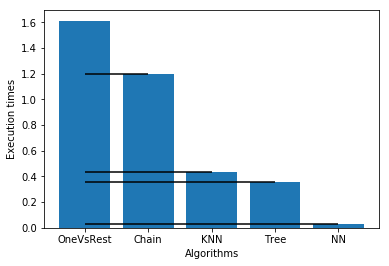

In [8]:
plt.bar(labels,execution_times,align='center') # A bar chart
plt.xlabel('Algorithms')
plt.ylabel('Execution times')
for i in range(len(execution_times)):
    plt.hlines(execution_times[i],0,labels[i]) # Here you are drawing the horizontal lines
plt.show()

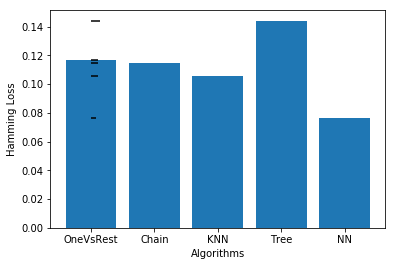

In [9]:
plt.bar(labels,hamming_losses,align='center') # A bar chart
plt.xlabel('Algorithms')
plt.ylabel('Hamming Loss')
for i in range(len(hamming_losses)):
    plt.hlines(hamming_losses[i],0,hamming_losses[i]) # Here you are drawing the horizontal lines
plt.show()